# Problem Statement

The Wine Quality Dataset contains 1,599 rows of data on the Portuguese “Vinho Verde” red wine. Each row of data represents a sample of wine, and contains 11 objective physico-chemical test results on the wine such as level of acidity (fixed acidity, volatile acidity, citric acid), sugar, chloride, sulphur (free sulphur dioxide, total sulphur dioxide), etc.

Our goal is to train machine learning models to accurately predict how the wine experts would have graded the wine, based on objective attributes such as acidity, sugar, chloride and sulphur levels. Logistic Regression, K-NN classification, and Decision Tree will be used to train the machine learning models, and we will compare the accuracy and duration of the 3 models in predicting the quality of wine.

# Source of Data

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

# 1a) Classification Techniques 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

In [2]:
df = pd.read_csv('winequality.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [3]:
# Check that all data are numerical
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
# Check for null data
df.loc[
    (df['fixed acidity'].isnull()) |
    (df['volatile acidity'].isnull()) |
    (df['citric acid'].isnull()) |
    (df['residual sugar'].isnull()) |
    (df['chlorides'].isnull()) |
    (df['free sulfur dioxide'].isnull()) |
    (df['total sulfur dioxide'].isnull()) |
    (df['density'].isnull()) |
    (df['pH'].isnull()) |
    (df['sulphates'].isnull()) |
    (df['alcohol'].isnull()) |
    (df['quality'].isnull()) 
]

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []

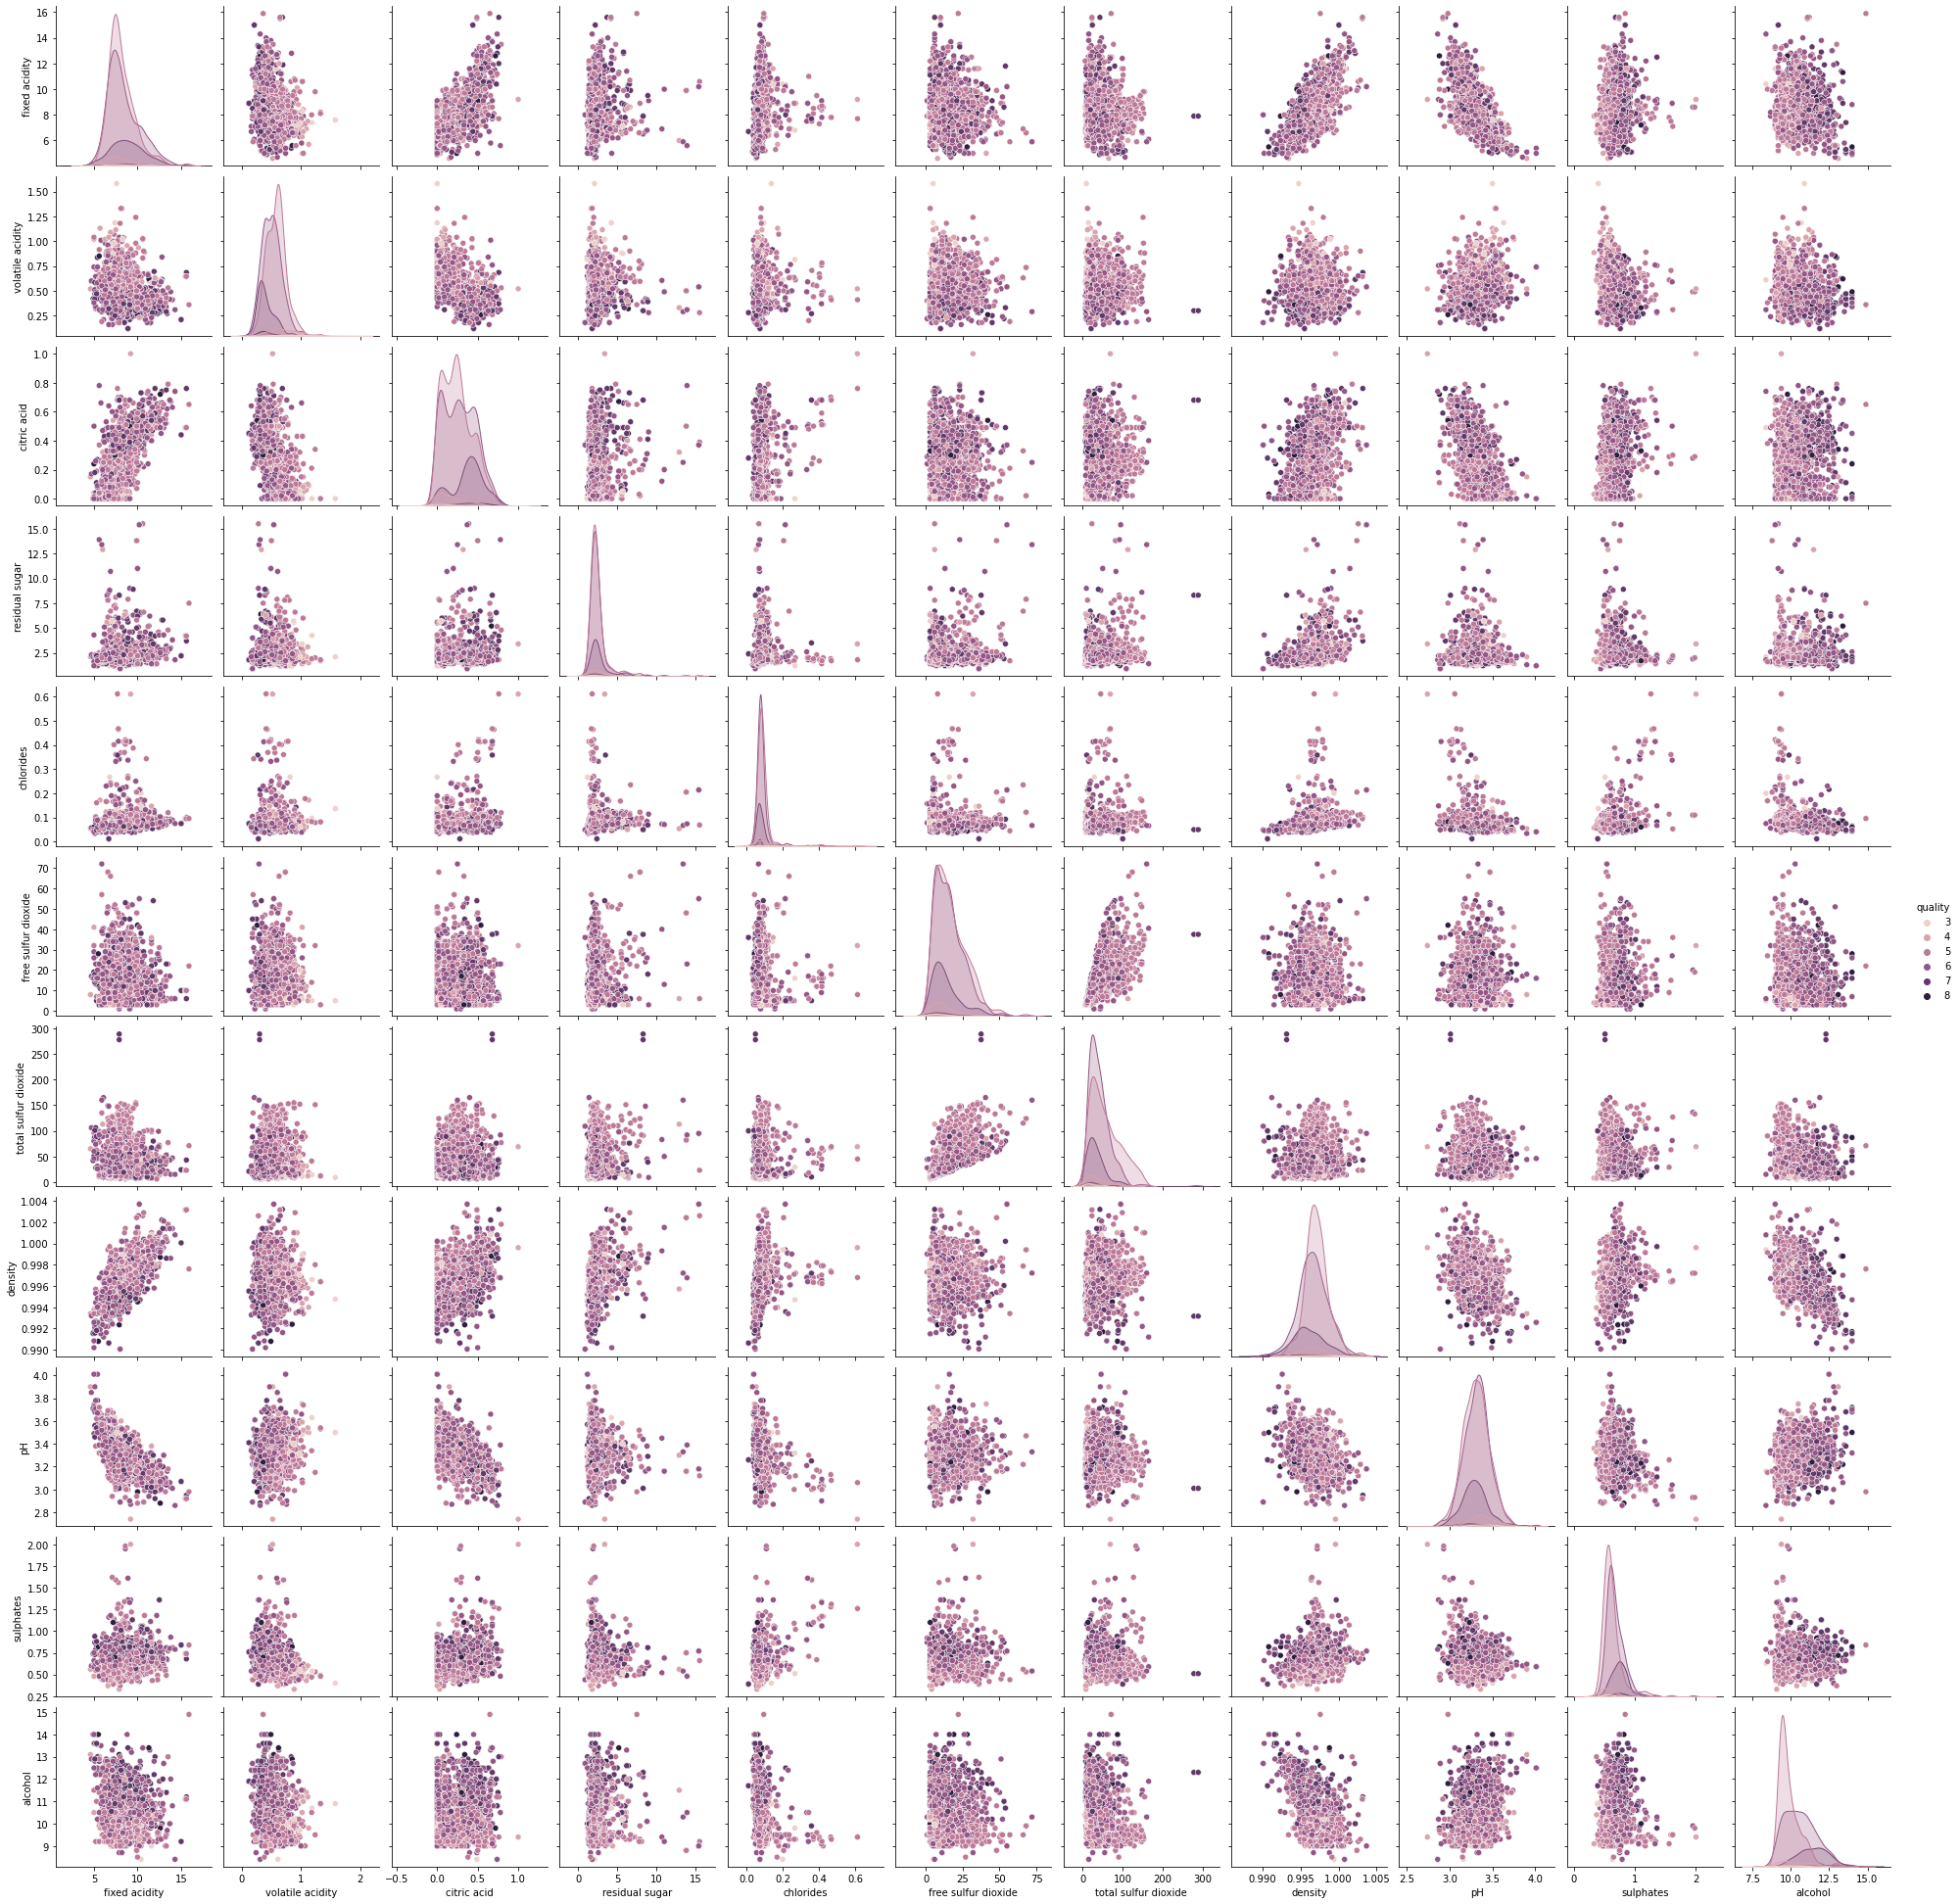

In [5]:
sb.pairplot(df, hue='quality')
plt.show()

Based on background understanding, we classify wine quality as good and not good

In [6]:
# Classify wine into quality >= 6 as good and < 6 as not good

def myfunction(x):
    if x < 6:
        return 0
    else:
        return 1
    
df['quality'] = df['quality'].apply(myfunction)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        1  
4         9.4        0  
...       ...      ...  
1594     10.5        0  
1595     11.2        1  
1596     11.0        1  
1597     10.2        0  
1598     11.0        1  

[1599 rows x 12 columns]

In [7]:
# Data Balancing - data is split into approximately half
df.groupby('quality').count()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
0                  744               744          744             744   
1                  855               855          855             855   

         chlorides  free sulfur dioxide  total sulfur dioxide  density   pH  \
quality                                                                       
0              744                  744                   744      744  744   
1              855                  855                   855      855  855   

         sulphates  alcohol  
quality                      
0              744      744  
1              855      855

In [8]:
# Check for duplication of rows of data
df.groupby('quality').nunique()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
0                   81               127           72              70   
1                   91               109           76              66   

         chlorides  free sulfur dioxide  total sulfur dioxide  density  pH  \
quality                                                                      
0              121                   51                   137      264  80   
1              112                   55                   105      332  84   

         sulphates  alcohol  
quality                      
0               82       46  
1               76       59

In [9]:
# quality is the label, remaining columns are the features
X = df.iloc[:, 0:11]
y = df['quality']

X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

### Visualise the Data

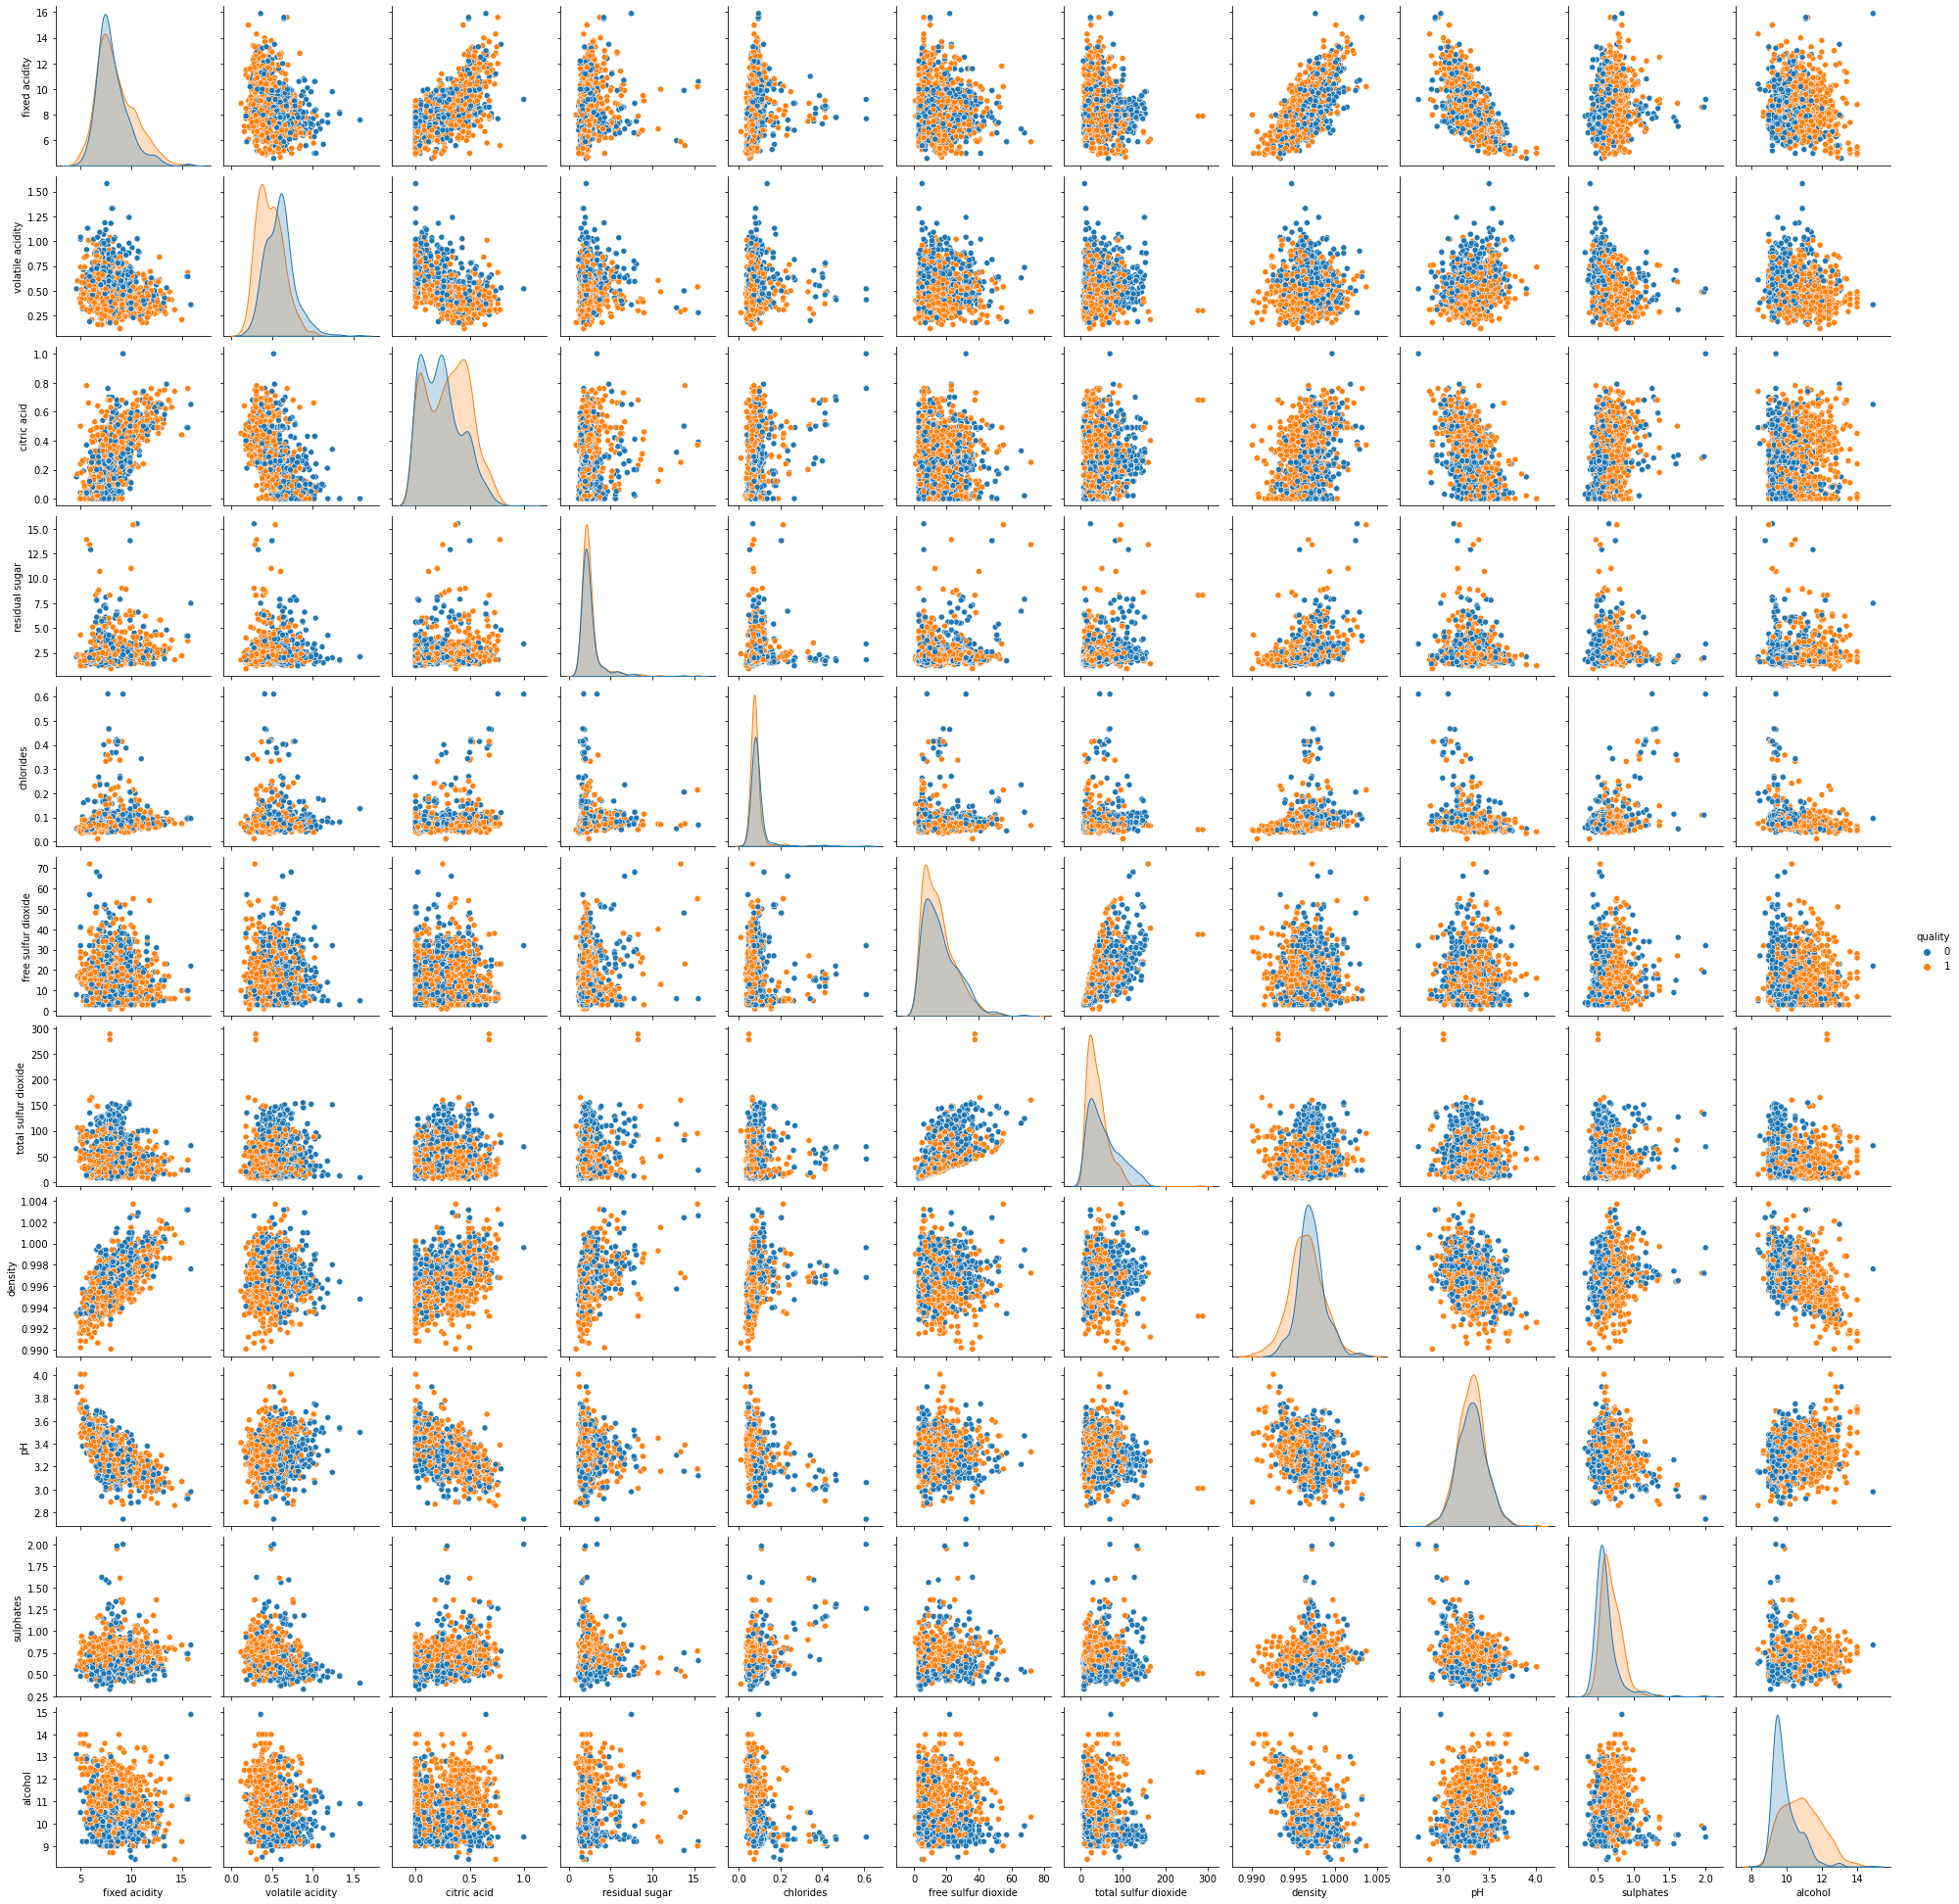

In [10]:
sb.pairplot(df, hue='quality')
plt.show()

### Model Training

In order for fair comparison between models, ensure that a consistent set of training and test data is used

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1199, 11)
(400, 11)
(1199,)
(400,)


In [13]:
X_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
582            11.7             0.490         0.49             2.2      0.083   
626             8.8             0.600         0.29             2.2      0.098   
1030            7.1             0.590         0.00             2.1      0.091   
620             8.3             0.540         0.24             3.4      0.076   
490             9.3             0.775         0.27             2.8      0.078   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
582                   5.0                  15.0  1.00000  3.19       0.43   
626                   5.0                  15.0  0.99880  3.36       0.49   
1030                  9.0                  14.0  0.99488  3.42       0.55   
620                  16.0                 112.0  0.99760  3.27       0.61   
490                  24.0                  56.0  0.99840  3.31       0.67   

      alcohol  
582       9.2  
626       9.1  
1030     11.5  
620       9.4  
490      10.6

In [14]:
X_test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
803             7.7              0.56         0.08            2.50      0.114   
124             7.8              0.50         0.17            1.60      0.082   
350            10.7              0.67         0.22            2.70      0.107   
682             8.5              0.46         0.31            2.25      0.078   
1326            6.7              0.46         0.24            1.70      0.077   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
803                  14.0                  46.0   0.9971  3.24       0.66   
124                  21.0                 102.0   0.9960  3.39       0.48   
350                  17.0                  34.0   1.0004  3.28       0.98   
682                  32.0                  58.0   0.9980  3.33       0.54   
1326                 18.0                  34.0   0.9948  3.39       0.60   

      alcohol  
803       9.6  
124       9.5  
350       9.9  
682       9.8  
1326     10.6

## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
import time
import datetime

logReg = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter=2000, random_state = 42)

In [16]:
# time in ms
t1 = time.time()
print(t1)
logReg.fit(X_train, y_train)
t2 = time.time()
print(t2)
print(int(round((t2-t1)*1000)))

1621430811.8501642
1621430812.22616
376


In [17]:
t3 = time.time()
print(t3)
y_pred = logReg.predict(X_test)
t4 = time.time()
print(t4)
print(int(round((t4-t3)*1000)))

1621430812.2311456
1621430812.2331414
2


In [18]:
print(y_pred)
print(y_test)

[0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1
 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1
 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1
 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0
 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1
 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1
 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1
 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0
 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0
 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1]
803     1
124     0
350     1
682     0
1326    1
       ..
1565    1
327     0
254     1
322     0
1160    1
Name: quality, Length: 400, dtype: int64


### Model Validation

In [19]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.7325


### Predict

Randomly input data to do a prediction

In [20]:
print(logReg.predict([[6, 0.2, 0.7, 2.4, 0.078, 9, 100, 0.999, 3.25, 0.77, 9.88]]))

[0]


In [21]:
print(logReg.predict([[7.9, 0.35, 0.46, 3.6, 0.078, 15, 37.3, 0.999, 3.55, 0.866, 12.88]]))

[1]


## K-NN Classification

### Choice of k

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# check accuracy score to choose optimised k value
k_array = np.arange(1, 31, 2)

for k in k_array:
    knn_ex = KNeighborsClassifier(n_neighbors = k)
    knn_ex.fit(X_train, y_train)
    ac = accuracy_score(y_test, knn_ex.predict(X_test))
    print('neighbors: {0}'.format(k))
    print(ac)

neighbors: 1
0.6475
neighbors: 3
0.62
neighbors: 5
0.62
neighbors: 7
0.5975
neighbors: 9
0.605
neighbors: 11
0.6025
neighbors: 13
0.6
neighbors: 15
0.605
neighbors: 17
0.625
neighbors: 19
0.6275
neighbors: 21
0.63
neighbors: 23
0.6275
neighbors: 25
0.63
neighbors: 27
0.6275
neighbors: 29
0.625


In [23]:
# select k = 21
# setting k too low increases bias and leads to miscalculation
# setting k too high is computationally expensive

knn = KNeighborsClassifier(n_neighbors = 21)

In [24]:
t5 = time.time()
print(t5)
knn.fit(X_train, y_train)
t6 = time.time()
print(t6)
print(int(round((t6-t5)*1000)))

1621430812.5742376
1621430812.5792148
5


In [25]:
t7 = time.time()
print(t7)
y_pred = knn.predict(X_test)
t8 = time.time()
print(t8)
print(int(round((t8-t7)*1000)))

1621430812.5851989
1621430812.6011567
16


In [26]:
print(y_pred)
print(y_test)

[0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1
 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1
 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1
 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0
 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1
 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1
 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1]
803     1
124     0
350     1
682     0
1326    1
       ..
1565    1
327     0
254     1
322     0
1160    1
Name: quality, Length: 400, dtype: int64


### Model Validation

In [27]:
print(accuracy_score(y_test, y_pred))

0.63


### Predict
Input the same data as in Logistic Regression to do a prediction

In [28]:
print(knn.predict([[6, 0.2, 0.7, 2.4, 0.078, 9, 100, 0.999, 3.25, 0.77, 9.88]]))

[0]


In [29]:
print(knn.predict([[7.9, 0.35, 0.46, 3.6, 0.078, 15, 37.3, 0.999, 3.55, 0.866, 12.88]]))

[1]


## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

### Build function to build Decision Tree

In [31]:
def decTreeScore(crit='gini', maxDepth = None, minSamples = 1, minSplit = 2):
    dect = DecisionTreeClassifier(criterion=crit, max_depth=maxDepth,
                                 min_samples_leaf=minSamples,
                                 min_samples_split=minSplit,
                                 random_state = 42)
    dect.fit(X_train, y_train)
    accuracy = accuracy_score(y_test,dect.predict(X_test))
    print(accuracy)
    return accuracy

In [32]:
decTreeScore()

0.7175


0.7175

### Try different hyperparameters

In [33]:
for i in np.arange(1, 15, 1):
    print('i =', i)
    decTreeScore(maxDepth=i)

i = 1
0.66
i = 2
0.66
i = 3
0.705
i = 4
0.715
i = 5
0.74
i = 6
0.74
i = 7
0.725
i = 8
0.7325
i = 9
0.7075
i = 10
0.72
i = 11
0.71
i = 12
0.7175
i = 13
0.7225
i = 14
0.71


From the result, when maximum depth allowed is 5 or 6, the acccuracy score is the highest at 0.74

In [34]:
for i in np.arange(1, 15, 1):
    print('i =', i)
    decTreeScore(minSamples=i)

i = 1
0.7175
i = 2
0.695
i = 3
0.6925
i = 4
0.7225
i = 5
0.735
i = 6
0.7325
i = 7
0.7325
i = 8
0.735
i = 9
0.7425
i = 10
0.745
i = 11
0.74
i = 12
0.72
i = 13
0.7375
i = 14
0.72


From the result, when minimum samples allowed in a leaf is 10, the acccuracy score is the highest at 0.745

In [35]:
for i in np.arange(2, 15, 1):
    print('i =', i)
    decTreeScore(minSplit = i)

i = 2
0.7175
i = 3
0.7075
i = 4
0.6925
i = 5
0.7025
i = 6
0.71
i = 7
0.685
i = 8
0.68
i = 9
0.6975
i = 10
0.6875
i = 11
0.705
i = 12
0.7025
i = 13
0.7025
i = 14
0.7


From the result, when the value of minimum samples required to split is 2, the accuracy score is highest at 0.7175

Therefore, use maxDepth = 5, minSamples = 10, minSplit = 2

In [36]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=5,
                                 min_samples_leaf=10,
                                 min_samples_split=2,  
                                 random_state = 42)

In [37]:
t9 = time.time()
print(t9)
dt.fit(X_train, y_train)
t10 = time.time()
print(t10)
print(int(round((t10-t9)*1000)))

1621430813.0210338
1621430813.02602
5


In [38]:
t11 = time.time()
print(t11)
y_pred = dt.predict(X_test)
t12 = time.time()
print(t12)
print(int(round((t12-t11)*1000)))

1621430813.0320024
1621430813.033998
2


In [39]:
print(y_pred)
print(y_test)

[0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1
 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1
 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1
 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0
 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0
 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1
 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1
 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1
 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0
 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0
 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1]
803     1
124     0
350     1
682     0
1326    1
       ..
1565    1
327     0
254     1
322     0
1160    1
Name: quality, Length: 400, dtype: int64


### Model Validation

In [40]:
accuracy_score(y_pred,y_test)

0.725

### Predict

Input the same data as the 2 models above to do a prediction

In [41]:
print(dt.predict([[6, 0.2, 0.7, 2.4, 0.078, 9, 100, 0.999, 3.25, 0.77, 9.88]]))

[0]


In [42]:
print(dt.predict([[7.9, 0.35, 0.46, 3.6, 0.078, 15, 37.3, 0.999, 3.55, 0.866, 12.88]]))

[1]


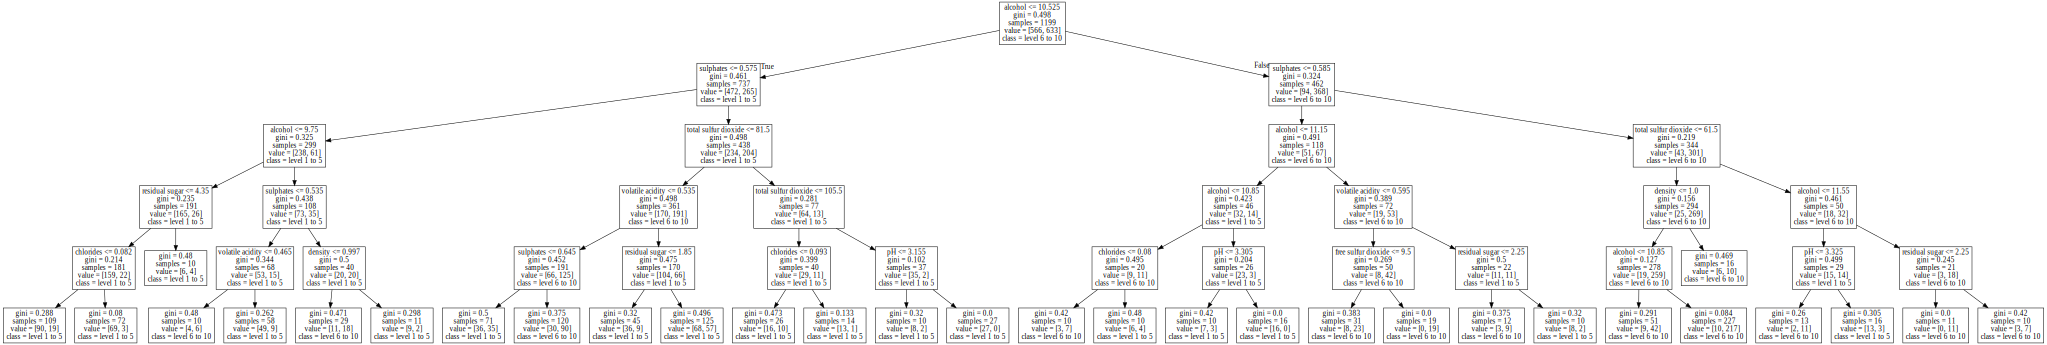

In [43]:
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None,
                           class_names=['level 1 to 5', 'level 6 to 10'],
                           feature_names=X_train.columns))

## Learning Points:

Based on the 3 Machine Learning Models
- For Logistic Regression, the training time is significantly longer than the prediction time
- For K-NN Classification, the training time is significantly shorter than the prediction time
- For Decision Tree, the training time is longer than the prediction time
- For this dataset, the accuracy score for Logistic Regression is the highest, followed by Decision Tree and then K-NN.

# 1b) Perform Data or Feature Engineering

## Feature Selection

In [44]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        1  
4         9.4        0  
...       ...      ...  
1594     10.5        0  
1595     11.2        1  
1596     11.0        1  
1597     10.2        0  
1598     11.0        1  

[1599 rows x 12 columns]

In [45]:
corr_mat = df.corr()
print('Pearson Correlation = \n', corr_mat)

Pearson Correlation = 
                       fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.095093         -0.321441     0.159129   

                      residual sugar  chlorides  free sulfur diox

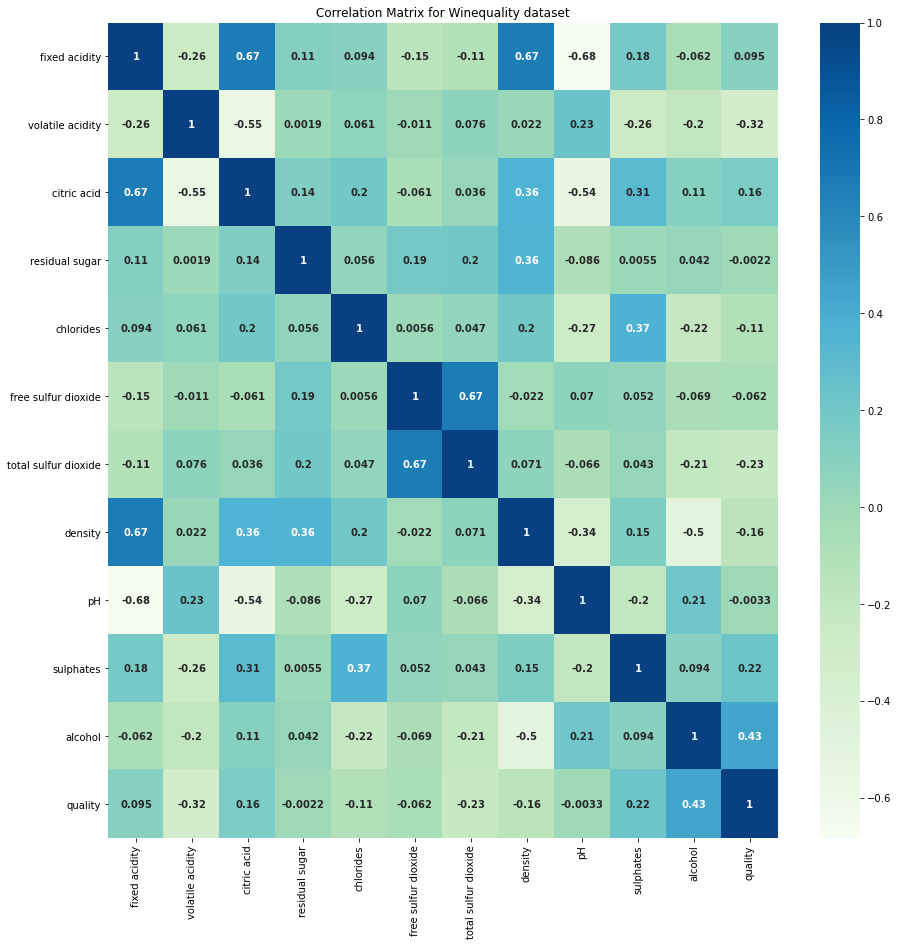

In [46]:
plt.figure(figsize=(15,15))
ax = sb.heatmap(data=corr_mat,
                annot=True,
                cmap='GnBu',
                annot_kws={'weight':'bold'})

plt.title('Correlation Matrix for Winequality dataset')
plt.show()

In [47]:
target = 'quality'
candidates = corr_mat[target][(corr_mat[target] >= 0.5) | (corr_mat[target] <= -0.5)]
to_drop = set(corr_mat[target].index) - set(candidates.index)
candidates_df = corr_mat.drop(index = to_drop, columns = to_drop)
candidates_df

quality
quality      1.0

There is little correlation between any single feature to the wine quality, hence it would not be appropriate to apply feature selection. The wine quality might be determined by the combination of all 11 features and is not affected solely based on any one particular feature.

## Feature Extraction

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [49]:
pd.set_option('display.max_columns', None)
df.head(n=20)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.700         0.00             1.9      0.076   
5             7.4             0.660         0.00             1.8      0.075   
6             7.9             0.600         0.06             1.6      0.069   
7             7.3             0.650         0.00             1.2      0.065   
8             7.8             0.580         0.02             2.0      0.073   
9             7.5             0.500         0.36             6.1      0.071   
10            6.7             0.580         0.08             1.8      0.097   
11            7.5             0.500         0.36             6.1      0.071   
12            5.6             0.615         0.00             1.6      0.089   
13            7.8             0.610         0.29             1.6      0.114   
14            8.9             0.620         0.18             3.8      0.176   
15            8.9             0.620         0.19             3.9      0.170   
16            8.5             0.280         0.56             1.8      0.092   
17            8.1             0.560         0.28             1.7      0.368   
18            7.4             0.590         0.08             4.4      0.086   
19            7.9             0.320         0.51             1.8      0.341   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  11.0                  34.0   0.9978  3.51       0.56   
5                  13.0                  40.0   0.9978  3.51       0.56   
6                  15.0                  59.0   0.9964  3.30       0.46   
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
9                  17.0                 102.0   0.9978  3.35       0.80   
10                 15.0                  65.0   0.9959  3.28       0.54   
11                 17.0                 102.0   0.9978  3.35       0.80   
12                 16.0                  59.0   0.9943  3.58       0.52   
13                  9.0                  29.0   0.9974  3.26       1.56   
14                 52.0                 145.0   0.9986  3.16       0.88   
15                 51.0                 148.0   0.9986  3.17       0.93   
16                 35.0                 103.0   0.9969  3.30       0.75   
17                 16.0                  56.0   0.9968  3.11       1.28   
18                  6.0                  29.0   0.9974  3.38       0.50   
19                 17.0                  56.0   0.9969  3.04       1.08   

    alcohol  quality  
0       9.4        0  
1       9.8        0  
2       9.8        0  
3       9.8        1  
4       9.4        0  
5       9.4        0  
6       9.4        0  
7      10.0        1  
8       9.5        1  
9      10.5        0  
10      9.2        0  
11     10.5        0  
12      9.9        0  
13      9.1        0  
14      9.2        0  
15      9.2        0  
16     10.5        1  
17      9.3        0  
18      9.0        0  
19      9.2        1

In [50]:
y = df.loc[: , 'quality'].values
x = StandardScaler().fit_transform(df.iloc[:, :11])

### Using PCA

- Principal Component Analysis (PCA) is a technique that reduces features/dimensions of a dataset while only losing a small amount of information!
- PCA works by finding the Maximum Variance of the given dataset within the new coordinate system!

Generate new features from the existing 11 features to provide a good enough approximation on the original dataset (reduce no. of features)

In [51]:
pca = PCA(n_components=6)
pc = pca.fit_transform(x)
print(pc)

[[-1.61952988  0.45095009 -1.77445415  0.04374031  0.06701448 -0.91392069]
 [-0.79916993  1.85655306 -0.91169017  0.54806597 -0.01839156  0.92971392]
 [-0.74847909  0.88203886 -1.17139423  0.41102067 -0.04353101  0.40147313]
 ...
 [-1.45612897  0.31174559  1.12423941  0.49187676  0.19371564 -0.50640956]
 [-2.27051793  0.97979111  0.62796456  0.63977007  0.06773549 -0.86040762]
 [-0.42697475 -0.53669021  1.6289552  -0.39171595  0.45048209 -0.49615364]]


In [52]:
# check Explained Variance (proportion of variance captured by each principal component)
print('Explained Variance ratio: ', pca.explained_variance_ratio_)

print('Explained Variance for ' + str(pca.n_components) + ' principal components: ', pca.explained_variance_ratio_.sum())

Explained Variance ratio:  [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439]
Explained Variance for 6 principal components:  0.8552471350762937


In [53]:
principalDf = pd.DataFrame(data = pc,
                           columns = ['Principal Component 1','Principal Component 2',
                                      'Principal Component 3','Principal Component 4',
                                      'Principal Component 5','Principal Component 6',])
principalDf

Principal Component 1  Principal Component 2  Principal Component 3  \
0                 -1.619530               0.450950              -1.774454   
1                 -0.799170               1.856553              -0.911690   
2                 -0.748479               0.882039              -1.171394   
3                  2.357673              -0.269976               0.243489   
4                 -1.619530               0.450950              -1.774454   
...                     ...                    ...                    ...   
1594              -2.150500               0.814286               0.617063   
1595              -2.214496               0.893101               1.807402   
1596              -1.456129               0.311746               1.124239   
1597              -2.270518               0.979791               0.627965   
1598              -0.426975              -0.536690               1.628955   

      Principal Component 4  Principal Component 5  Principal Component 6  
0                  0.043740               0.067014              -0.913921  
1                  0.548066              -0.018392               0.929714  
2                  0.411021              -0.043531               0.401473  
3                 -0.928450              -1.499149              -0.131017  
4                  0.043740               0.067014              -0.913921  
...                     ...                    ...                    ...  
1594               0.407687              -0.240936               0.054835  
1595               0.414003               0.119592              -0.674711  
1596               0.491877               0.193716              -0.506410  
1597               0.639770               0.067735              -0.860408  
1598              -0.391716               0.450482              -0.496154  

[1599 rows x 6 columns]

In [54]:
X1 = pc
y1 = y

In [55]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 42)

### Logistic Regression (after Feature Extraction)

In [56]:
t20 = time.time()
print(t20)
logReg.fit(X1_train, y1_train)
t21 = time.time()
print(t21)
print(int(round((t21-t20)*1000)))

1621430814.4053297
1621430814.4133284
8


Compare Logistic Regression training time: 
- Before: 376ms
- After: 8ms

In [57]:
t22 = time.time()
print(t22)
y1_pred = logReg.predict(X1_test)
t23 = time.time()
print(t23)
print(int(round((t23-t22)*1000)))

1621430814.4172971
1621430814.4172971
0


Compare Logistic Regression prediction time: 
- Before: 2ms
- After: 0ms (precision out of milisecond, it's seems in microsecond)

In [58]:
print(accuracy_score(y1_test, logReg.predict(X1_test)))

0.725


Compare Logistic Regression accuracy scores:
- Before: 0.7325
- After: 0.725

### K-NN Classification (after Feature Extraction)

#### Choice of k

In [59]:
k_array = np.arange(1, 31, 2)

for k in k_array:
    knn_ex = KNeighborsClassifier(n_neighbors = k)
    knn_ex.fit(X1_train, y1_train)
    ac = accuracy_score(y1_test, knn_ex.predict(X1_test))
    print('neighbors: {0}'.format(k))
    print(ac)

neighbors: 1
0.725
neighbors: 3
0.695
neighbors: 5
0.6825
neighbors: 7
0.6575
neighbors: 9
0.6675
neighbors: 11
0.6925
neighbors: 13
0.6825
neighbors: 15
0.6775
neighbors: 17
0.68
neighbors: 19
0.685
neighbors: 21
0.6825
neighbors: 23
0.68
neighbors: 25
0.685
neighbors: 27
0.6975
neighbors: 29
0.7


##### Choice of k from original K-NN Model = 21

In [60]:
knn = KNeighborsClassifier(n_neighbors = 21)

t24 = time.time()
print(t24)
knn.fit(X1_train, y1_train)
t25 = time.time()
print(t25)
print(int(round((t25-t24)*1000)))

1621430814.7005398
1621430814.702536
2


Compare K-NN training time: 
- Before: 5ms
- After: 2ms

In [61]:
t26 = time.time()
print(t26)
y1_pred = knn.predict(X1_test)
t27 = time.time()
print(t27)
print(int(round((t27-t26)*1000)))

1621430814.7085185
1621430814.725472
17


Compare K-NN prediction time: 
- Before: 16ms
- After: 17ms

In [62]:
print(accuracy_score(y1_test, y1_pred))

0.6825


Compare K-NN accuracy scores:
- Before: 0.63
- After: 0.6825

##### New choice of k = 11

In [63]:
knn = KNeighborsClassifier(n_neighbors = 11)

In [64]:
t24 = time.time()
print(t24)
knn.fit(X1_train, y1_train)
t25 = time.time()
print(t25)
print(int(round((t25-t24)*1000)))

1621430814.7494118
1621430814.7514112
2


Compare K-NN training time: 
- Before: 5ms
- After: 2ms

In [65]:
t26 = time.time()
print(t26)
y1_pred = knn.predict(X1_test)
t27 = time.time()
print(t27)
print(int(round((t27-t26)*1000)))

1621430814.761377
1621430814.7763379
15


Compare K-NN prediction time: 
- Before: 16ms
- After: 15ms

In [66]:
print(accuracy_score(y1_test, y1_pred))

0.6925


Compare K-NN accuracy scores:
- Before: 0.63
- After: 0.6925

### Decision Tree (after Feature Extraction)

In [67]:
def decTreeScore(crit='gini', maxDepth = None, minSamples = 1, minSplit = 2):
    dect = DecisionTreeClassifier(criterion=crit, max_depth=maxDepth,
                                 min_samples_leaf=minSamples,
                                 min_samples_split=minSplit,
                                 random_state = 42)
    dect.fit(X1_train, y1_train)
    accuracy = accuracy_score(y1_test,dect.predict(X1_test))
    print(accuracy)
    return accuracy

In [68]:
decTreeScore()

0.7375


0.7375

#### Use the same hyperparameters as original Decision Tree Model

In [69]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=5,
                                 min_samples_leaf=10,
                                 min_samples_split=2,  
                                 random_state = 42)

In [70]:
t28 = time.time()
print(t28)
dt.fit(X1_train, y1_train)
t29 = time.time()
print(t29)
print(int(round((t29-t28)*1000)))

1621430814.818226
1621430814.8212173
3


Compare Decision Tree training time: 
- Before: 5ms
- After: 3ms

In [71]:
t30 = time.time()
print(t30)
y1_pred = dt.predict(X1_test)
t31 = time.time()
print(t31)
print(int(round((t31-t30)*1000)))

1621430814.826203
1621430814.8272002
1


Compare Decision Tree prediction time: 
- Before: 2ms
- After: 1ms

In [72]:
accuracy_score(y1_pred,y1_test)

0.6675

Compare Decision Tree accuracy scores: 
- Before: 0.725
- After: 0.6675

#### Try different hperparameters

In [73]:
for i in np.arange(1, 15, 1):
    print('i =', i)
    decTreeScore(maxDepth=i)

i = 1
0.635
i = 2
0.63
i = 3
0.6775
i = 4
0.6675
i = 5
0.68
i = 6
0.7075
i = 7
0.7125
i = 8
0.73
i = 9
0.705
i = 10
0.7025
i = 11
0.7175
i = 12
0.7175
i = 13
0.7225
i = 14
0.715


From the result, when maximum depth allowed is 8, the acccuracy score is the highest at 0.73

In [74]:
for i in np.arange(1, 15, 1):
    print('i =', i)
    decTreeScore(minSamples=i)

i = 1
0.7375
i = 2
0.7225
i = 3
0.7325
i = 4
0.725
i = 5
0.75
i = 6
0.725
i = 7
0.7125
i = 8
0.725
i = 9
0.705
i = 10
0.6975
i = 11
0.69
i = 12
0.6925
i = 13
0.665
i = 14
0.6475


From the result, when minimum samples allowed in a leaf is 5, the acccuracy score is the highest at 0.75

In [75]:
for i in np.arange(2, 15, 1):
    print('i =', i)
    decTreeScore(minSplit = i)

i = 2
0.7375
i = 3
0.72
i = 4
0.72
i = 5
0.72
i = 6
0.72
i = 7
0.7175
i = 8
0.7125
i = 9
0.7175
i = 10
0.715
i = 11
0.71
i = 12
0.7225
i = 13
0.73
i = 14
0.7325


From the result, when the value of minimum samples required to split is 2, the accuracy score is highest at 0.7375

Therefore, use maxDepth = 8, minSamples = 5, minSplit = 2

In [76]:
dt1 = DecisionTreeClassifier(criterion='gini', max_depth=8,
                                 min_samples_leaf=5,
                                 min_samples_split=2,
                                 random_state = 42)

In [77]:
t32 = time.time()
print(t32)
dt1.fit(X1_train, y1_train)
t33 = time.time()
print(t33)
print(int(round((t33-t32)*1000)))

1621430815.06656
1621430815.0705497
4


Compare Decision Tree training time: 
- Before: 5ms
- After: 4ms

In [78]:
t34 = time.time()
print(t34)
y1_pred = dt1.predict(X1_test)
t35 = time.time()
print(t35)
print(int(round((t35-t34)*1000)))

1621430815.0755367
1621430815.0755367
0


Compare Decision Tree prediction time: 
- Before: 2ms
- After: 0ms (precision out of milisecond, it's seems in microsecond)

In [79]:
accuracy_score(y1_pred,y1_test)

0.7375

Compare Decision Tree accuracy scores: 
- Before: 0.725
- After: 0.7375

## Learning Points:

With Feature Engineering (Feature Extraction), 

1. Using the same hyperparameters as the original model:

    - The Logistic Regression model saw a tremendous improvement in efficiency in terms of the shorter training time (improve 97%) and prediction time (improve above 55%). There was however a slight drop in accuracy score (decrease 1%)

    - For K-NN Classification, there was an improvement in the training time (improve 60%) and no significant difference in the prediction time. There was an increase in accuracy score (improve 8.3%)

    - For Decision Tree, there was an improvement in both training (improve 40%) and prediction time (improve 50%). The accuracy score decreased (decrease 7.9%)
    

2. Using optimal hyperparameter values:

    - For K-NN Classification, there was an improvement in both the training time (improve 60%) and prediction time (improve 50%). There was a greater increase in accuracy score (improve 9.9%)

    - For Decision Tree, there was an improvement in both training (improve 40%) and prediction time (improve above 55%). The accuracy score decreased (improve 1.7%)

# Conclusion

Based on our dataset,

- Comparing accuracy scores, Logistic Regression seems to be the best model to do data prediction
- However, other factors like duration for training and predicting of data needs to be considered as well. When dealing with a large volume of data, it is important that the model can process the data with eficiency.
- With this in mind, the Decision Tree Model seems to be the best option, producing fairly accurate predictions with efficiency.
- We can combine the existing features (that do not show any strong correlation to label) to generate new features that has a strong correlation with the label to accurately predict data.
- Overall, Feature Engineering is good practice to get accurate predictions within a shorter timeframe. It is greatly improves efficiency of processing data!